In [1]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.models.rnn import rnn, rnn_cell
import numpy as np
import numpy.random as rng

In [3]:
import pandas.io.data as web
from pykalman import KalmanFilter
import numpy as np
import pandas as pd

In [4]:
def get_prices(symbol):
    start, end = '2007-05-02', '2016-04-11'
    data = web.DataReader(symbol, 'yahoo', start, end)
    data=pd.DataFrame(data)
    prices=data['Adj Close']
    #prices=np.asarray(list(prices))
    prices=prices.astype(float)
    return prices

In [5]:
gs = get_prices('GS')

In [6]:
def get_returns(prices):
    return (prices-prices.shift(-1))/prices

In [7]:
rets = get_returns(gs)

In [8]:
def sort_data(rets, N):
    ins = []
    outs = []
    for i in range(N):
        xx = np.random.randint(len(rets)-100)
        ins.append(rets[xx:xx+100].tolist())
        outs.append(rets[xx+100])
    return np.array(ins), np.array(outs)

In [9]:
ins, outs = sort_data(rets, 1000)


In [38]:
sess = tf.InteractiveSession()

In [23]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [24]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


In [28]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [29]:
pred = tf.add(tf.mul(X, W), b)

In [31]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.091446109 W= 0.182682 b= 1.28282
Epoch: 0100 cost= 0.089783251 W= 0.186662 b= 1.25419
Epoch: 0150 cost= 0.088311955 W= 0.190405 b= 1.22726
Epoch: 0200 cost= 0.087010317 W= 0.193926 b= 1.20194
Epoch: 0250 cost= 0.085858762 W= 0.197236 b= 1.17812
Epoch: 0300 cost= 0.084839784 W= 0.200349 b= 1.15573
Epoch: 0350 cost= 0.083938077 W= 0.203278 b= 1.13466
Epoch: 0400 cost= 0.083140224 W= 0.206032 b= 1.11484
Epoch: 0450 cost= 0.082434244 W= 0.208623 b= 1.09621
Epoch: 0500 cost= 0.081809469 W= 0.211059 b= 1.07868
Epoch: 0550 cost= 0.081256568 W= 0.213351 b= 1.06219
Epoch: 0600 cost= 0.080767289 W= 0.215506 b= 1.04669
Epoch: 0650 cost= 0.080334298 W= 0.217534 b= 1.0321
Epoch: 0700 cost= 0.079951070 W= 0.21944 b= 1.01839
Epoch: 0750 cost= 0.079611927 W= 0.221234 b= 1.00548
Epoch: 0800 cost= 0.079311736 W= 0.222921 b= 0.993349
Epoch: 0850 cost= 0.079046093 W= 0.224507 b= 0.981936
Epoch: 0900 cost= 0.078810960 W= 0.225999 b= 0.971202
Epoch: 0950 cost= 0.078602836 W= 0.227403 b= 

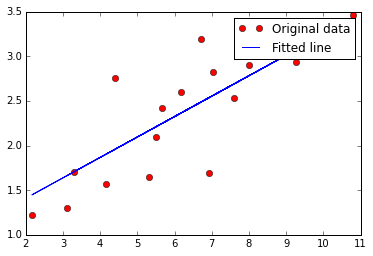

In [39]:
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [40]:
sess.run(W)

0.22872236

In [41]:
sess.run(pred, feed_dict={X: train_X})

array([ 1.70639634,  1.95799088,  2.20958543,  2.48633957,  2.53665853,
        1.90492737,  3.18828845,  2.36557412,  2.68761539,  1.44725394,
        2.56227541,  3.4197557 ,  2.16681457,  2.78070521,  2.24480867,
        3.0718689 ,  1.66065192], dtype=float32)

In [43]:
sess.run(tf.add(tf.mul(X, W), b), feed_dict={X: train_X})

array([ 1.70639634,  1.95799088,  2.20958543,  2.48633957,  2.53665853,
        1.90492737,  3.18828845,  2.36557412,  2.68761539,  1.44725394,
        2.56227541,  3.4197557 ,  2.16681457,  2.78070521,  2.24480867,
        3.0718689 ,  1.66065192], dtype=float32)

In [10]:
sess = tf.InteractiveSession()

In [11]:
x = tf.placeholder(tf.float32, [None, 100])
y_ = tf.placeholder(tf.float32, [None, 1])

In [12]:
W = tf.Variable(tf.zeros([100, 1]))
b = tf.Variable(tf.zeros([1]))

In [13]:
y = tf.matmul(x, W) + b

In [32]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [16]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [17]:
init = tf.initialize_all_variables()

In [18]:
sess = tf.Session()
sess.run(init)

In [19]:
for i in range(1000):
  #batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(optimizer, feed_dict={x: ins, y_: outs.reshape(1,-1).T})

In [21]:
predict = y

In [25]:
p = sess.run(predict, feed_dict={x: ins})

In [27]:
p.shape

(1000, 1)

In [28]:
outs.shape

(1000,)

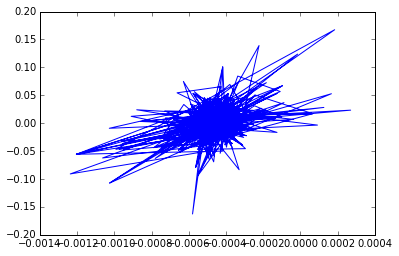

In [29]:
plot(p, outs)